# House Sales in King County, USA - data analysys
Author: Olga Sieradzan


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In this data analysys following libries will be used:


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets


The data is downloaded from IBM Developer Skills Network


In [38]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)
df.head()


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


For now the data is uncleaned, meaning having useless columns, missing parts and wrong types. In the next section - Data Wrangling - the data set is going to be prepared for analysys. Before that it is udefull to know information about data set. It is eaisly obtained from .info() and .describe() methodes. 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

Almost every column is an numeric type, but for example the date is the object type - which is problem, will handle that later. Additionally it is easy to spot that two columns (bedrooms and bathrooms) have null records. 

We use the method describe to obtain a statistical summary of the dataframe.


In [40]:
df.describe().round(2)

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,2.161300e+04,21613.00,21600.00,21603.00,21613.00,21613.00,21613.00,21613.00,21613.00,...,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,10806.00,4.580302e+09,540088.14,3.37,2.12,2079.90,15106.97,1.49,0.01,0.23,...,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,6239.28,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,...,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,0.00,1.000102e+06,75000.00,1.00,0.50,290.00,520.00,1.00,0.00,0.00,...,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,5403.00,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,...,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,10806.00,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,...,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,16209.00,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,...,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,21612.00,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,...,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


Looking at this statystical information it is easy to notice that values from each column have diffrent ranges - the data is not normalized. Also column Unnamed and id seems to be useless in the analysys - it will be removed in the next steps

# Module 2: Data Wrangling


Using simple methods like  <code>.drop() </code> and  <code>.replace() </code>, we will clean the data set.

In [41]:
df.drop(["id", "Unnamed: 0", "date"], axis = 1, inplace= True)
df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21600.00,21603.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.12,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,75000.00,1.00,0.50,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


Now in the dataset, only usefull information stayed. We dropped two first columns with id's, the rest will be used in the modelling

As the previos part shown - we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [42]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>.

In [43]:
df['bedrooms'].replace(np.nan,df['bedrooms'].mean(), inplace=True)

C:\Users\olgas\AppData\Local\Temp\ipykernel_2208\2937488510.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan,df['bedrooms'].mean(), inplace=True)


We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>



In [44]:
df['bathrooms'].replace(np.nan,df['bathrooms'].mean(), inplace=True)

C:\Users\olgas\AppData\Local\Temp\ipykernel_2208\394068299.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathrooms'].replace(np.nan,df['bathrooms'].mean(), inplace=True)


At the end, it is always usefull to check if the cleaning went as planed

In [45]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


In this part - we will selects some columns and try to take out as much information from data set as possible - using statistics and plots

## Number of floors

First - we want to analyze houses about their floors - how diverse is King Count house market? 

In [46]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<Axes: xlabel='floors', ylabel='Count'>

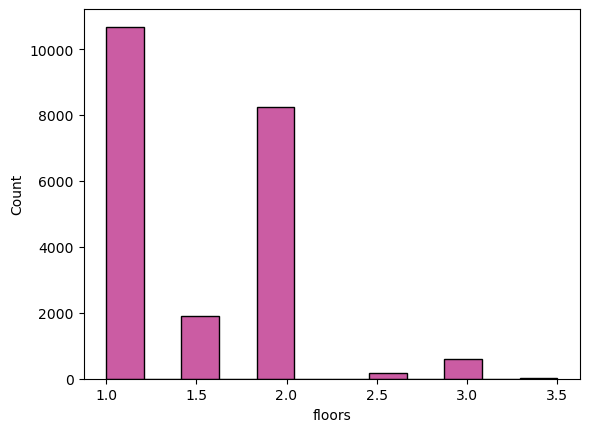

In [47]:
sns.histplot(df['floors'], color = "#BA2684", binwidth= 0.2)

With incline in number of full floors - number of houses shrinks significantly. Unfortunetly we cannot find what is a house with half of floor? We can see that houses with halfs of flors are way less popular than houses with only full floors. Still the market is preatty diverse looking at the graph

## Waterfront view

Next intresting feature of houses selled in King Count is waterfromt view. Do houses with waterfrontview sell for higher price or is it completly unrelated. In order to check this, the boxplots were prepered.

<Axes: xlabel='waterfront', ylabel='price'>

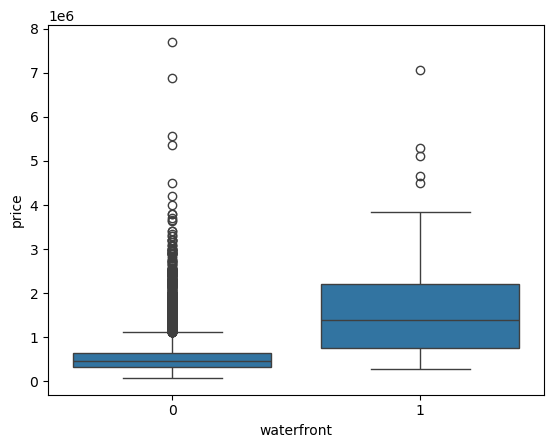

In [48]:
sns.boxplot(x = df["waterfront"], y = df['price'])

Looking at this graph, we can easily notice that median in houses with waterfront view is way higher (around 1.5M USD) than median for other houses (around 600K USD). Nevertheless - other houses have a lot more outliers - even ones that are more exspensive than houses with waterfront view. 

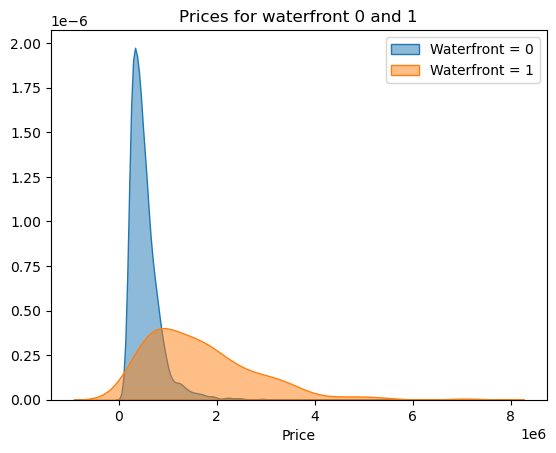

In [49]:
sns.kdeplot(
    data=df[df['waterfront'] == 0],
    x='price',
    fill=True,
    label='Waterfront = 0',
    alpha=0.5
)

sns.kdeplot(
    data=df[df['waterfront'] == 1],
    x='price',
    fill=True,
    label='Waterfront = 1',
    alpha=0.5
)

plt.legend()
plt.title("Prices for waterfront 0 and 1")
plt.xlabel("Price")
plt.ylabel("")
plt.show()

Additionaly we can see that there are way less houses with waterfrontview - and they tend to be more price than the most popular not waterfront view houses, but not more price from all of them

## Square footage of the house

Next importnat feature of huse is houses's squre footage ( without the basement). Does bigger homes get bigger prices or is it the other way around?

<Axes: xlabel='sqft_above', ylabel='price'>

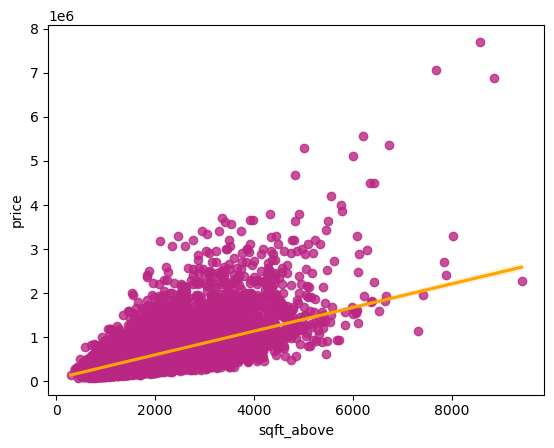

In [50]:
sns.regplot(x = df['sqft_above'], y = df['price'], line_kws ={"color": "orange"}, color = "#BA2684")

The regplot points out that the correlation between those two features is positive - the biger square footage the bigger the price - which is easy to predict. Let's see what value is correlated with price the strongest. 

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [60]:
df.corr()['price'].sort_values(ascending=False).to_frame()

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525738
view,0.397293
sqft_basement,0.323816
bedrooms,0.308797
lat,0.307003


it can be easly seen that the most important featires is square footage and the grade house was given by the concil

# Module 4: Model Development


After EDA it is time to try to use the data set for prediction of house prices. In this part we will bulid some Linear reggression models.

For example - We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [52]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

Of course the result is tragic - the longitude feature is barly correlkated with the price. While building model we will need better fit.

We can use the highest correleted vale - square footage of living area.


In [ ]:
Z = df[['sqft_living']]
lm.fit(Z,Y)
lm.score(Z, Y)

0.4928532179037931

Using one variable we achived 49% - that is not high but not so dissapointing either. It will be more usefull to use a list of features

### Question 7

Fit a linear regression model to predict the <code>'price'</code> using the list of features:


In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Then calculate the R^2. Take a screenshot of your code.


In [66]:
M = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
lm.fit(M,Y)
lm.score(M, Y)


0.6576951666037505

Using more features from dataset, we obtained higher R2 value - 66%. 
The model development can be taken further - using polymonial regression. 
Now we will be using pipeline for performing model development

In [54]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.


In [67]:
from sklearn.metrics import r2_score
pipe = Pipeline(Input)
M = M.astype(float)

pipe.fit(M,Y)

ypipe = pipe.predict(M)
print(r2_score(Y,ypipe))

0.7513323588250258


Using polymonial regression was succesful - the relation is not that linear after all. The obtained R2 result is 75% - which quite is high. 

# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

done


We will split the data into training and testing sets:


In [68]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [57]:
from sklearn.linear_model import Ridge

In [69]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test, yhat))

0.6478759163939107


In [70]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)

RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7002744263524896
